<a href="https://colab.research.google.com/github/darthfelipe21/Data_Scientist/blob/main/Tuning_for_DataScience_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [ ]:
# gestión de los datos
import numpy as np
import pandas as pd

# gestión de las fechas
from datetime import date           # para fechas
from datetime import datetime       # para fechas y horas
from datetime import timedelta      # para hacer calculos de fechas (OJO: solo de semanas, días, horas, minutos, secundos, micros y mili secundos)

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# fecha

In [ ]:
# creamos la lista de fechas desde el 01/01/2022 hasta el 31/12/2022

fechas = []
fecha = date(2022, 1, 1)

for i in range(365):
  fechas.append(fecha)
  fecha = fecha + timedelta(days=1)

In [ ]:
type(fecha)

datetime.date

In [ ]:
# verifico si las 5 primeras fechas son las correctas

fechas[:5]

[datetime.date(2022, 1, 1),
 datetime.date(2022, 1, 2),
 datetime.date(2022, 1, 3),
 datetime.date(2022, 1, 4),
 datetime.date(2022, 1, 5)]

In [ ]:
# verifico si las 5 últimas fechas son las correctas

fechas[-5:]

[datetime.date(2022, 12, 27),
 datetime.date(2022, 12, 28),
 datetime.date(2022, 12, 29),
 datetime.date(2022, 12, 30),
 datetime.date(2022, 12, 31)]

nota a parte para la pregunta de como añadir un mes::

In [ ]:
# no se puede añadir un mes con la libreria datetime.
# tampoco sirve añadir 31 días porque no todos los meses tienen 31 días

# ejemplo
fecha = date(2022, 2, 14)   # creo la fecha 14 de febrero de 2022
fecha + timedelta(days=31)  # si añado 31 días devuelve el 17 de marzo de 2022

datetime.date(2022, 3, 17)

In [ ]:
# para añadir un mes, la libreria dateutil es muy util:

from dateutil.relativedelta import *

fecha = date(2022, 2, 14)           # creo la fecha 14 de febrero de 2022
fecha + relativedelta(months=1)     # me devuelve la fecha correcta

datetime.date(2022, 3, 14)

In [ ]:
fecha + relativedelta(years=1)      # puedeo tambien añadir un año

datetime.date(2023, 2, 14)

Existen diferentes librerias para el tema de fechas, que es muy amplio.  
Conviene mirar la documentación para saber cual es la sintaxis y los parametros.  
Aquí el link de la documentación de datetime (libreria de Python):  
https://docs.python.org/3/library/datetime.html#  
Aquí el link de la documentación de dateutil  
https://dateutil.readthedocs.io/en/stable/index.html

# ventas

## ventas Paco

In [ ]:
# creamos una lista con 365 ventas aleatorias con media de 100€ y una desviación estandár de 25€
# añadimos una semilla para poder repetir el proceso y obtener el mismo resultado

np.random.seed(14)
ventas_paco = np.random.normal(100, 25, 365)

In [ ]:
# imprimimos los 5 primeros para comprobar que ha funcionado
# puedes comprobar que gracias a la semilla, sacas el mismo resultado desde otro pc
# 5 primeras ventas: [138.78347778, 101.97965062, 104.34941321, 98.19158585, 49.891765]

ventas_paco[:5]

array([138.78347778, 101.97965062, 104.34941321,  98.19158585,
        49.891765  ])

In [ ]:
# verificamos el tipo de objeto obtenido

type(ventas_paco)

numpy.ndarray

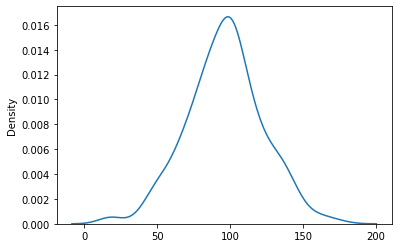

In [ ]:
# hacemos un grafico de las ventas obtenidas para comprobar que siguen una distribución normal alrededor de 100€

sns.kdeplot(ventas_paco)
plt.show()

## ventas María

repetimos el mismo proceso para generar las ventas de María, misma media, otra desviación estandár

In [ ]:
# creamos una lista con 365 ventas aleatorias con media de 100€ y una desviación estandár de 40€
# cambio la semilla para que los resultados sean muy diferentes a las ventas de paco

np.random.seed(24)
ventas_maria = np.random.normal(100, 40, 365)

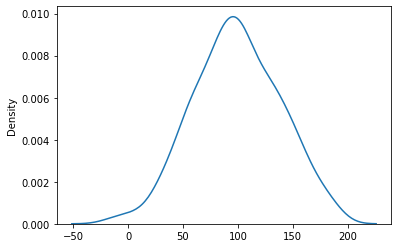

In [ ]:
# hacemos un grafico de las ventas obtenidas para comprobar que siguen una distribución normal alrededor de 100€

sns.kdeplot(ventas_maria)
plt.show()

# creación del dataframe

In [ ]:
# creao un dataframe vacio

df = pd.DataFrame()

In [ ]:
df

""


In [ ]:
# creo una nueva columna con la lista de fechas

df['fecha'] = fechas

In [ ]:
type(fechas[0])

datetime.date

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fecha   365 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [ ]:
df

,fecha
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
360,2022-12-27
361,2022-12-28
362,2022-12-29
363,2022-12-30


In [ ]:
# creo una nueva columna con el array de numpy de las ventas de Paco

df['ventas_paco'] = ventas_paco

In [ ]:
# comprueba que ya tengo una tabla en formato de dataframe con 2 variables (fecha, ventas_paco)

df

,fecha,ventas_paco
0,2022-01-01,138.783478
1,2022-01-02,101.979651
2,2022-01-03,104.349413
3,2022-01-04,98.191586
4,2022-01-05,49.891765
...,...,...
360,2022-12-27,135.209496
361,2022-12-28,108.190167
362,2022-12-29,90.051474
363,2022-12-30,100.999975


In [ ]:
# creo una nueva columna con el array de numpy de las ventas de María

df['ventas_maria'] = ventas_maria

In [ ]:
df

,fecha,ventas_paco,ventas_maria
0,2022-01-01,138.783478,153.168487
1,2022-01-02,101.979651,69.198662
2,2022-01-03,104.349413,87.348786
3,2022-01-04,98.191586,60.367585
4,2022-01-05,49.891765,57.167350
...,...,...,...
360,2022-12-27,135.209496,32.679059
361,2022-12-28,108.190167,86.382933
362,2022-12-29,90.051474,146.937940
363,2022-12-30,100.999975,58.964337


# limpieza de datos

### redondear

In [ ]:
# redondeo las ventas a 2 decimales usando numpy con una serie de pandas

df['ventas_paco'] = np.round(df['ventas_paco'], 2)
df['ventas_maria'] = np.round(df['ventas_maria'], 2)

In [ ]:
df

,fecha,ventas_paco,ventas_maria
0,2022-01-01,138.78,153.17
1,2022-01-02,101.98,69.20
2,2022-01-03,104.35,87.35
3,2022-01-04,98.19,60.37
4,2022-01-05,49.89,57.17
...,...,...,...
360,2022-12-27,135.21,32.68
361,2022-12-28,108.19,86.38
362,2022-12-29,90.05,146.94
363,2022-12-30,101.00,58.96


## ventas negativas

queremos cambiar las ventas negativas a 0

In [ ]:
# filtramos las ventas negativas de paco

df[df['ventas_paco'] <0]

,fecha,ventas_paco,ventas_maria


In [ ]:
# filtramos las ventas negativas de maria

df[df['ventas_maria'] <0]

,fecha,ventas_paco,ventas_maria
66,2022-03-08,101.32,-3.07
186,2022-07-06,93.35,-14.80
283,2022-10-11,52.10,-12.24


In [ ]:
# vamos a cambiar las ventas negativas por 0
# con una función

def ventas_pos(venta):
  if venta < 0:
    venta = 0
  else:
    venta = venta

  return venta

df['ventas_paco'] = df['ventas_paco'].apply(ventas_pos)

In [ ]:
# vamos a cambiar las ventas negativas por 0
# con lambda

df['ventas_maria'] = df['ventas_maria'].apply(lambda ventas:
                                              0 if ventas <0
                                              else ventas)

In [ ]:
# comporbamos que ya no hay ventas negativas

df[df['ventas_maria'] <0]

,fecha,ventas_paco,ventas_maria


## ventas del fin de semana

queremos cambiar las ventas del fin de semana a 0 ya que la tienda estaba cerrada.



In [ ]:
# comprobamos el tipo de la variable fecha: pandas la considera string (object)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         365 non-null    object 
 1   ventas_paco   365 non-null    float64
 2   ventas_maria  365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [ ]:
# cambiamos la variable fecha a un formato de fecha

df['fecha'] = pd.to_datetime(df['fecha'])

In [ ]:
# comprobamos el cambio

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         365 non-null    datetime64[ns]
 1   ventas_paco   365 non-null    float64       
 2   ventas_maria  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.7 KB


incorporamos el día de la semana

In [ ]:
# no se puede aplicar el metodo weeday() a una serie

# df['dia_sem'] = df['fecha'].weekday()

In [ ]:
# usamos lambda para aplicar la función weekday() a cada uno de los elementos

df['dia_sem'] = df['fecha'].apply(lambda fecha: fecha.weekday())

In [ ]:
df

,fecha,ventas_paco,ventas_maria,dia_sem
0,2022-01-01,138.78,153.17,5
1,2022-01-02,101.98,69.20,6
2,2022-01-03,104.35,87.35,0
3,2022-01-04,98.19,60.37,1
4,2022-01-05,49.89,57.17,2
...,...,...,...,...
360,2022-12-27,135.21,32.68,1
361,2022-12-28,108.19,86.38,2
362,2022-12-29,90.05,146.94,3
363,2022-12-30,101.00,58.96,4


In [ ]:
import calendar

df['dia_sem'] = df['dia_sem'].apply(lambda fecha: calendar.day_name[fecha])
df

,fecha,ventas_paco,ventas_maria,dia_sem
0,2022-01-01,138.78,153.17,Saturday
1,2022-01-02,101.98,69.20,Sunday
2,2022-01-03,104.35,87.35,Monday
3,2022-01-04,98.19,60.37,Tuesday
4,2022-01-05,49.89,57.17,Wednesday
...,...,...,...,...
360,2022-12-27,135.21,32.68,Tuesday
361,2022-12-28,108.19,86.38,Wednesday
362,2022-12-29,90.05,146.94,Thursday
363,2022-12-30,101.00,58.96,Friday


In [ ]:
# cambiamos el orden de las columnas (por estetica)

df = df[['dia_sem', 'fecha', 'ventas_paco', 'ventas_maria']]
df

,dia_sem,fecha,ventas_paco,ventas_maria
0,Saturday,2022-01-01,138.78,153.17
1,Sunday,2022-01-02,101.98,69.20
2,Monday,2022-01-03,104.35,87.35
3,Tuesday,2022-01-04,98.19,60.37
4,Wednesday,2022-01-05,49.89,57.17
...,...,...,...,...
360,Tuesday,2022-12-27,135.21,32.68
361,Wednesday,2022-12-28,108.19,86.38
362,Thursday,2022-12-29,90.05,146.94
363,Friday,2022-12-30,101.00,58.96


transformamos las ventas del fin de semana a 0

In [ ]:
# creo la lista de los días del din de semana

finde = ['Saturday', 'Sunday']

In [ ]:
# creo la columna entre_sem

df['entre_sem'] = df['dia_sem'].apply(lambda dia:
                                      0 if dia in finde
                                      else 1)

<ipython-input-92-721c3d9f5281>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['entre_sem'] = df['dia_sem'].apply(lambda dia:


In [ ]:
df

,dia_sem,fecha,ventas_paco,ventas_maria,entre_sem
0,Saturday,2022-01-01,138.78,153.17,0
1,Sunday,2022-01-02,101.98,69.20,0
2,Monday,2022-01-03,104.35,87.35,1
3,Tuesday,2022-01-04,98.19,60.37,1
4,Wednesday,2022-01-05,49.89,57.17,1
...,...,...,...,...,...
360,Tuesday,2022-12-27,135.21,32.68,1
361,Wednesday,2022-12-28,108.19,86.38,1
362,Thursday,2022-12-29,90.05,146.94,1
363,Friday,2022-12-30,101.00,58.96,1


In [ ]:
# cambio las ventas de paco

df['ventas_paco'] = df['ventas_paco'] * df['entre_sem']
df

<ipython-input-94-6842f8046d8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ventas_paco'] = df['ventas_paco'] * df['entre_sem']


,dia_sem,fecha,ventas_paco,ventas_maria,entre_sem
0,Saturday,2022-01-01,0.00,153.17,0
1,Sunday,2022-01-02,0.00,69.20,0
2,Monday,2022-01-03,104.35,87.35,1
3,Tuesday,2022-01-04,98.19,60.37,1
4,Wednesday,2022-01-05,49.89,57.17,1
...,...,...,...,...,...
360,Tuesday,2022-12-27,135.21,32.68,1
361,Wednesday,2022-12-28,108.19,86.38,1
362,Thursday,2022-12-29,90.05,146.94,1
363,Friday,2022-12-30,101.00,58.96,1


In [ ]:
# otra forma para hacerlo con una condición sobre otra columna

def venta_finde(venta, dia):
  if dia in finde:
    venta = 0
  return venta

df["ventas_maria"] = df.apply(lambda x: venta_finde(x['ventas_maria'], x['dia_sem']), axis=1)

<ipython-input-95-2b48faf9808a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ventas_maria"] = df.apply(lambda x: venta_finde(x['ventas_maria'], x['dia_sem']), axis=1)


In [ ]:
df

,dia_sem,fecha,ventas_paco,ventas_maria,entre_sem
0,Saturday,2022-01-01,0.00,0.00,0
1,Sunday,2022-01-02,0.00,0.00,0
2,Monday,2022-01-03,104.35,87.35,1
3,Tuesday,2022-01-04,98.19,60.37,1
4,Wednesday,2022-01-05,49.89,57.17,1
...,...,...,...,...,...
360,Tuesday,2022-12-27,135.21,32.68,1
361,Wednesday,2022-12-28,108.19,86.38,1
362,Thursday,2022-12-29,90.05,146.94,1
363,Friday,2022-12-30,101.00,58.96,1


In [ ]:
# elimino la columna entre_sem
# drop no cambia el dataframe sino que devuelve otro: poner inplace=True o afectar el resultado a otra variable

df.drop(['entre_sem'], axis=1, inplace=True)

In [ ]:
df

,dia_sem,fecha,ventas_paco,ventas_maria
0,Saturday,2022-01-01,0.00,0.00
1,Sunday,2022-01-02,0.00,0.00
2,Monday,2022-01-03,104.35,87.35
3,Tuesday,2022-01-04,98.19,60.37
4,Wednesday,2022-01-05,49.89,57.17
...,...,...,...,...
360,Tuesday,2022-12-27,135.21,32.68
361,Wednesday,2022-12-28,108.19,86.38
362,Thursday,2022-12-29,90.05,146.94
363,Friday,2022-12-30,101.00,58.96


## melt

In [ ]:
# metodo interesante:
# creo un nuevo dataframe verticalizando el dataframe
# para crear la variable 'vendedor' en lugar de tener 2 variables (ventas_paco y ventas_maria)

df_melt = df.melt(id_vars=['dia_sem', 'fecha'], var_name=['vendedor'], value_name='ventas')
df_melt

,dia_sem,fecha,vendedor,ventas
0,Saturday,2022-01-01,ventas_paco,0.00
1,Sunday,2022-01-02,ventas_paco,0.00
2,Monday,2022-01-03,ventas_paco,104.35
3,Tuesday,2022-01-04,ventas_paco,98.19
4,Wednesday,2022-01-05,ventas_paco,49.89
...,...,...,...,...
725,Tuesday,2022-12-27,ventas_maria,32.68
726,Wednesday,2022-12-28,ventas_maria,86.38
727,Thursday,2022-12-29,ventas_maria,146.94
728,Friday,2022-12-30,ventas_maria,58.96


# analisis: cual es el mejor vendedor?

In [ ]:
# info del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dia_sem       365 non-null    object        
 1   fecha         365 non-null    datetime64[ns]
 2   ventas_paco   365 non-null    float64       
 3   ventas_maria  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 11.5+ KB


In [ ]:
# estadísticas básicas de las variables numéricas

df.describe()

,ventas_paco,ventas_maria
count,365.000000,365.000000
mean,68.464301,69.414630
std,48.832902,54.997554
min,0.000000,0.000000
25%,0.000000,0.000000
50%,84.410000,76.480000
75%,104.370000,110.620000
max,176.160000,189.450000


In [ ]:
# estadísticas básicas transpuestas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ventas_paco,365.0,68.464301,48.832902,0.0,0.0,84.41,104.37,176.16
ventas_maria,365.0,69.414630,54.997554,0.0,0.0,76.48,110.62,189.45


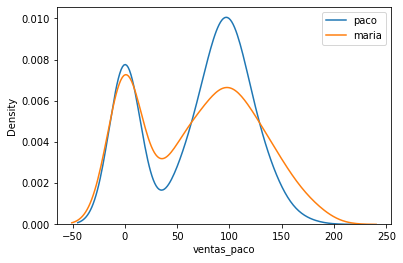

In [ ]:
# ploteamos la repartición de las ventas

sns.kdeplot(df['ventas_paco'], label='paco')
sns.kdeplot(df['ventas_maria'], label='maria')
plt.legend()
plt.show()

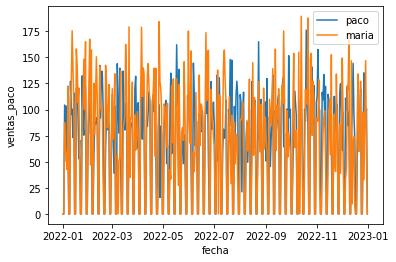

In [ ]:
# ploteamos la evolución de las ventas en el año

sns.lineplot(data=df, x='fecha', y='ventas_paco', label='paco')
sns.lineplot(data=df, x='fecha', y='ventas_maria', label='maria')
plt.legend()
plt.show()

## agrupación por semana

In [ ]:
# creo la columna numero de semana

df['num_sem'] = df['fecha'].apply(lambda fecha: fecha.isocalendar()[1])

In [ ]:
df

,dia_sem,fecha,ventas_paco,ventas_maria,num_sem
0,Saturday,2022-01-01,0.00,0.00,52
1,Sunday,2022-01-02,0.00,0.00,52
2,Monday,2022-01-03,104.35,87.35,1
3,Tuesday,2022-01-04,98.19,60.37,1
4,Wednesday,2022-01-05,49.89,57.17,1
...,...,...,...,...,...
360,Tuesday,2022-12-27,135.21,32.68,52
361,Wednesday,2022-12-28,108.19,86.38,52
362,Thursday,2022-12-29,90.05,146.94,52
363,Friday,2022-12-30,101.00,58.96,52


In [ ]:
# agrupo sumando las ventas de paco por semana

df.groupby('num_sem')['ventas_paco'].sum()

num_sem
1     418.52
2     511.99
3     457.18
4     538.76
5     459.56
6     410.45
7     610.81
8     426.13
9     402.28
10    508.13
11    521.28
12    399.91
13    504.13
14    504.65
15    494.40
16    487.24
17    363.56
18    406.64
19    472.92
20    621.11
21    325.47
22    473.57
23    505.13
24    453.39
25    465.73
26    492.23
27    494.82
28    398.51
29    568.80
30    531.73
31    448.14
32    388.62
33    492.23
34    518.96
35    475.31
36    433.26
37    487.27
38    488.32
39    503.25
40    463.66
41    367.72
42    556.51
43    564.33
44    577.79
45    574.44
46    485.64
47    501.89
48    496.37
49    514.17
50    486.15
51    428.95
52    507.46
Name: ventas_paco, dtype: float64

In [ ]:
# lo pongo en un nuevo dataframe

df_sem = df.groupby('num_sem')['ventas_paco'].sum().to_frame()
df_sem

,ventas_paco
num_sem,
1,418.52
2,511.99
3,457.18
4,538.76
5,459.56
6,410.45
7,610.81
8,426.13
9,402.28


In [ ]:
# añado las ventas de maria

df_sem['ventas_maria'] = df.groupby('num_sem')['ventas_maria'].sum()
df_sem

,ventas_paco,ventas_maria
num_sem,,
1,418.52,369.92
2,511.99,654.12
3,457.18,574.19
4,538.76,615.67
5,459.56,576.94
6,410.45,575.59
7,610.81,481.79
8,426.13,563.61
9,402.28,494.73


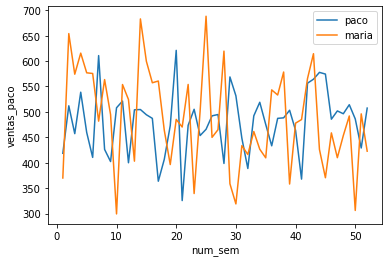

In [ ]:
# ploteamos la evolución de las ventas semanales

sns.lineplot(df_sem['ventas_paco'], label='paco')
sns.lineplot(df_sem['ventas_maria'], label='maria')
plt.legend()
plt.show()

## progresión sobre la semana anterior

In [ ]:
# añadimos la columna del procentaje de progresión de ventas sobre la semana anterior, redondeado a 1 decimal

df_sem['prog_paco'] = np.round(df_sem['ventas_paco'].pct_change().mul(100), 1)
df_sem['prog_maria'] = np.round(df_sem['ventas_maria'].pct_change().mul(100), 1)

In [ ]:
df_sem

,ventas_paco,ventas_maria,prog_paco,prog_maria
num_sem,,,,
1,418.52,369.92,NaN,NaN
2,511.99,654.12,22.3,76.8
3,457.18,574.19,-10.7,-12.2
4,538.76,615.67,17.8,7.2
5,459.56,576.94,-14.7,-6.3
6,410.45,575.59,-10.7,-0.2
7,610.81,481.79,48.8,-16.3
8,426.13,563.61,-30.2,17.0
9,402.28,494.73,-5.6,-12.2


In [ ]:
# cambiar una variable numérica a categórica

df_sem['prog_paco'] = df_sem['prog_paco'].astype('category')

In [ ]:
df_sem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ventas_paco   52 non-null     float64 
 1   ventas_maria  52 non-null     float64 
 2   prog_paco     51 non-null     category
 3   prog_maria    51 non-null     float64 
dtypes: category(1), float64(3)
memory usage: 4.1 KB
